In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [2]:
def convert(char):
    return format(ord(char), '09b')

In [3]:
quantization_table = [[16, 11, 10, 16, 24, 40, 51, 61],
                [12, 12, 14, 19, 26, 58, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [68, 56, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]]

In [4]:
def decrypt(image_dct, image):
    data = ''
    image_data = image.astype(float)
    image_data_dct = image_dct.astype(float)
    m, n = image_data.shape
#     image_dct = np.zeros(image.shape)
    x_division = int(m/8)
    y_division = int(n/8)
    
    a = 0
    
    for i in range(0, x_division):
        for j in range(0, y_division):
            x_s = i * 8
            x_e = (i+1) * 8
            y_s = j * 8
            y_e = (j+1) * 8
            lis_dct = cv2.dct(image_data[x_s:x_e,y_s:y_e]) / quantization_table
            lis_dct_new = image_data_dct[x_s:x_e,y_s:y_e]
            
#             if a < 1:
#                 print (lis_dct)
#                 print (lis_dct_new)
#                 a += 1

            for k, l in zip(lis_dct, lis_dct_new):
                for m, n in zip(k, l):
                    if m == n:
#                         print ("Equal")
                        continue
                    elif abs(n - m) >= 1.9 and abs(n - m) <= 2.1:
                        data += '0'
#                         print ("0")
#                         print (data)
                    elif abs(n - m) >= 2.9 and abs(n - m) <= 3.1:
                        data += '1'
#                         print ("1")
#                         print (data)
    
    to_return = ''
    for i in range(0, int(len(data) / 9)):
        substr = data[i * 9 : (i + 1) * 9]
        print (substr)
        num = int(substr, 2)
        print (num)
        to_return += chr(num)
        
    print (to_return)

In [5]:
def dct(image):
    image_data = image.astype(float)
    m, n = image_data.shape
    image_dct = np.zeros(image.shape)
    x_division = int(m/8)
    y_division = int(n/8)
    print ('m = ', m)
    print ('n = ', n)
    print (x_division)
    print (y_division)
    
    lis_dct = []
    x = 0
    F = 0
    lis_F = []
    TF = 0.1
    lis_selected = []
    
    T = 0.2
    TL = 0
    TH = 0
    
    pointer = 0
    
    avg = 0
    
    eof = 0
    
    a = 0
    
    f = open("Data.txt","r")
    string = f.read()
#     print (string)
    
    data = ''
    for i in string:
        data += convert(i)
#     print (string)
#     print (data)
    

    for i in range(0, x_division):
        for j in range(0, y_division):
            x_s = i * 8
            x_e = (i+1) * 8
            y_s = j * 8
            y_e = (j+1) * 8
            image_dct[x_s:x_e, y_s:y_e] = cv2.dct(image_data[x_s:x_e,y_s:y_e]) / quantization_table
            lis_dct = cv2.dct(image_data[x_s:x_e,y_s:y_e]) / quantization_table
            y = 0
            sum_coeff = 0
            avg = 0
            
            if eof == 0:
            
                for l in lis_dct:
                    for k in l:
                        if y == 0:
                            y += 1
                            continue
                        else:
                            y += 1
                            sum_coeff += (k * k)
                            avg += k
    #             print ('sum_coeff = ', sum_coeff)
                F = sum_coeff/64
                avg /= 64
                # Indexes of selected blocks inserted in a list, useful while traversing later
                if F < TF:
                    lis_selected.append((i, j))

                    """ Embedding Code Start """
                    for l in range(0, 8):
                        for m in range(0, 8):
                            k = lis_dct[l][m]
#                             print (k)
    #                         x = k
                            if T >= 0:
            #                     print ("IN1")
            #                     print (abs(x - T))
                                if abs(k - T) <= 0.1:
                                    current = 0
#                                     print ("IN2")

                                    if pointer == len(data):
                                        print ("End of file")
                                        eof = 1
                                        break    

                                    c = data[pointer]
                                    pointer += 1
#                                     print ("Read a character:", c)
#                                     print ("Old K: ", k)
                                    if c == '0':
                                        k += 2
                                        lis_dct[l][m] += 2
                                        image_dct[x_s:x_e, y_s:y_e] = lis_dct
#                                         print (l, m)
                                    elif c == '1':
                                        k += 3
                                        lis_dct[l][m] += 3
                                        image_dct[x_s:x_e, y_s:y_e] = lis_dct
#                                         print (l, m)
#                                     print ("New K: ", k)

                                elif (k - T) > 0.1:
                                    k += 1
                                    lis_dct[l][m] += 1
                                    image_dct[x_s:x_e, y_s:y_e] = lis_dct
    #                                 print (k)

                            else:
                                print ("OUT1")
                                if abs(k - T) <= 0.1:
                                    current = 0
                                    print ("OUT2")

                                    if pointer == len(data):
                                        print ("End of file")
                                        eof = 1
                                        break

                                    c = data[pointer]
                                    print ("Read a character:", c)
                                    pointer += 1
#                                     print ("Old K: ", k)
                                    if c == '0':
                                        k = -2 - k
                                        lis_dct[l][m] = -2 - lis_dct[l][m]
                                        image_dct[x_s:x_e, y_s:y_e] = lis_dct
                                        print (l, m)
                                    elif c == '1':
                                        k = -3 - k
                                        lis_dct[l][m] = -3 - lis_dct[l][m]
                                        image_dct[x_s:x_e, y_s:y_e] = lis_dct
                                        print (l, m)
#                                     print ("New K: ", k)

                                elif (k - T) < 0.1:
                                    k = -1 - k
                                    lis_dct[l][m] = -1 - lis_dct[l][m]
                                    image_dct[x_s:x_e, y_s:y_e] = lis_dct
                    """ Embedding Code Finish """


                lis_F.append(F)
    #             if x < 5:
    #                 print (F)
    #                 print (lis_dct)
    #                 print (avg)
    #                 x += 1
    #                 print ('y = ', y)

#     print ("Avg is ", sum(lis_F) / len(lis_F))
#     print (lis_F)
    print (data)
    print ("Length of lis_F = ", len(lis_F))
    print ("Length of lis_selected = ", len(lis_selected))
#     print (lis_selected)
    return image_dct




In [7]:
image = cv2.imread('github.jpeg', 0)

# DCT
image_dct = dct(image)
# print (image)

decrypt(image_dct, image)

# plt.subplot(131)
# plt.imshow(image, 'gray')
# plt.title('original image')
# plt.xticks([]), plt.yticks([])

# plt.subplot(132)
# plt.imshow(image_dct, 'gray')
# plt.title('dct')
# plt.xticks([]), plt.yticks([])

m =  2100
n =  1179
262
147
End of file
End of file
End of file
001010011001110101001111001001100001001110011001101000001101000001101000001101000001101000000101110000101110000101110000101110000101110000101110000110010000101110000101110000101110001000000001000000001000000
Length of lis_F =  227
Length of lis_selected =  101
001010011
83
001110101
117
001111001
121
001100001
97
001110011
115
001101000
104
001101000
104
001101000
104
001101000
104
001101000
104
000101110
46
000101110
46
000101110
46
000101110
46
000101110
46
000101110
46
000110010
50
000101110
46
000101110
46
000101110
46
001000000
64
001000000
64
001000000
64
Suyashhhhh......2...@@@


In [40]:
# hist() function
# https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_image_histogram_calcHist.php

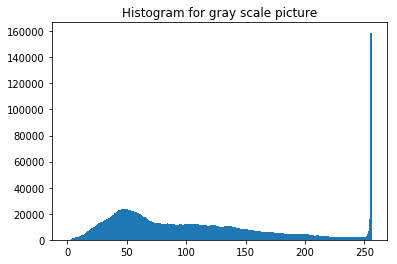

In [5]:
# hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist,bins = np.histogram(image,256,[0,256])
a = plt.hist(image.ravel(),256,[0,256])
plt.title('Histogram for gray scale picture')
plt.show()

In [6]:
hist = list(filter(lambda a: a != 0, hist))
print(len(hist))

256


In [7]:
format(14, '#010b')

'0b00001110'

In [8]:
format(256, '#010b')

'0b100000000'

In [9]:
format(256, '09b')

'100000000'

In [10]:
format(97, '09b')

'001100001'

In [21]:
f = open("Data.txt","r")
string = f.read()
print (string)

97


In [22]:
data = ''
for i in string:
    data += convert(i)
print (string)
print (data)

97
000111001000110111


In [70]:
s1 = '001001000001100101001101100001101100001101111000001010001110111001101111001110010001101100001100100'
s2 = '001001000001100101001101100001101100001101111000001010001110111001101111001110010001101100001100100'
if s1 == s2:
    print ("g")

g


In [72]:
int('10', 2)

2

In [7]:
str1 = "1010010001100101001110110001100101001110010001110011001101001001100010001101100001100101000100000001100100001100001001110100001100001000100000001101000001101001001100100001101001001101110001100111000100000001101001001110011000100000001100001000100000001110100001111001001110000001100101000100000001101111001100110000100000001100100001100001001110100001100001000100000001101000001101001001100100001101001001101110001100111000100000001110100001100101001100011001101000001101110001101001001110001001110101001100101001110011000100000001110111001101000001100101001110010001100101001100010001111001000100000001110100001101000001100101000100000001101000001101111001110011001110100000100000001101001001101101001100001001100111001100101000100000001100011001100001001101110000100000001100010001100101000100000001110010001100101001100011001101111001110110001100101001110010001100101001100100000100000001100101001111000001100001001100011001110100001101100001111001000101110000100000001000010001100101001101001001101110001100111000100000001101100001101111001110011001110011001101100001100101001110011001110011000100000001101101001100001001101011001100101001110011000100000001110100001101000001101001001110011000100000001110100001100101001100011001101000001101110001101001001110001001110101001100101000100000001110011001110101001101001001110100001100001001100010001101100001100101000100000001100110001101111001110010000100000001101101001100101001100100001101001001100011001100001001101100000100000001100001001101110001100100000100000001101101001101001001101100001101001001110100001100001001110010001111001000100000001100001001110000001110000001101100001101001001100011001100001001110100001101001001101111001101110001110011000101110000100000001000100001101001001100110001100110001100101001110010001100101001101110001100011001100101000100000001100101001111000001110000001100001001101110001110011001101001001101111001101110000100000000101000001000100001000101000101001000100000001101001001110011000100000001101111001101110001100101000100000001101111001100110000100000001110100001101000001100101000100000001101101001101111001110011001110100000100000001101001001101101001110000001101111001110010001110100001100001001101110001110100000100000001110100001100101001100011001101000001101110001101001001110001001110101001100101001110011000100000001110111001101000001101001001100011001101000000100000001100001001110010001100101000100000001110101001110011001100101001100100000100000001100110001101111001110010000100000001110010001100101001110110001100101001110010001110011001101001001100010001101100001100101000100000001100100001100001001110100001100001000100000001101000001101001001100100001101001001101110001100111000101110000100000001010100001101000001101001001110011000100000001110100001100101001100011001101000001101110001101001001110001001110101001100101000100000001110010001100101001100011001100101001101001001110110001100101001100100000100000001101101001101111001110010001100101000100000001100001001110100001110100001100101001101110001110100001101001001101111001101110000100000001101111001110110001100101001110010000100000001110100001101000001100101000100000001111001001100101001100001001110010001110011000100000001100010001100101001100011001100001001110101001110011001100101000100000001101111001100110000100000001101001001110100001110011000100000001101000001101001001100111001101000000100000001100101001100110001100110001101001001100011001101001001100101001101110001100011001111001000100000001100001001101110001100100000100000001110011001101001001101101001110000001101100001101001001100011001101001001110100001111001000101110000100000001010100001101000001100101000100000001100001001101001001101101000100000001101111001100110000100000001110100001101000001101001001110011000100000001110000001100001001110000001100101001110010000100000001101001001110011000100000001110100001101111000100000001110000001110010001100101001110011001100101001101110001110100000100000001100001000100000001110010001100101001110110001101001001100101001110111000100000001101111001100110000100000001110010001100101001110110001100101001110010001110011001101001001100010001101100001100101000100000001000100001000101000101101001100010001100001001110011001100101001100100000100000001100100001100001001110100001100001000100000001101000001101001001100100001101001001101110001100111000100000001110100001100101001100011001101000001101110001101001001110001001110101001100101001110011000100000001110000001110010001101111001110000001101111001110011001100101001100100000100000001110011001101111000100000001100110001100001001110010000100000001101001001101110000100000001101111001110010001100100001100101001110010000100000001110100001101111000100000001100100001100101001100110001101001001101110001100101000100000001110100001101000001100101000100000001110000001110101001110010001110000001101111001110011001100101000100000001101111001100110000100000001000100001000101000101101001100010001100001001110011001100101001100100000100000001100100001100001001110100001100001000100000001101000001101001001100100001101001001101110001100111000101100000100000001110010001100101001100110001101100001100101001100011001110100001101001001101110001100111000100000001110010001100101001100011001100101001101110001110100000100000001110000001110010001101111001100111001110010001100101001110011001110011000101100000100000001100001001101110001100100000100000001110000001110010001101111001110110001101001001100100001100101000100000001110011001101111001101101001100101000100000001110010001100101001110011001100101001100001001110010001100011001101000000100000001101001001110011001110011001110101001100101001110011000100000001100110001101111001110010000100000001110100001101000001100101000100000001100110001110101001110100001110101001110010001100101000101110000100000001001101001100001001101110001111001000100000001110010001100101001110011001100101001100001001110010001100011001101000001100101001110010001110011000100000001110100001110010001101001001100101001100100000100000001110100001101111000100000001101001001101101001110000001110010001101111001110110001100101000100000001101001001110100001110011000100000001110000001100101001110010001100110001101111001110010001101101001100001001101110001100011001100101000100000001101001001101110000100000001110100001100101001110010001101101001110011000100000001101111001100110000100000001101000001101001001100100001101001001101110001100111000100000001100011001100001001110000001100001001100011001101001001110100001111001000100000001100001001101110001100100000100000001110110001101001001110011001110101001100001001101100000100000001110000001100101001110010001100011001100101001110000001110100001101001001100010001101001001101100001101001001110100001111001000101110000100000001001000001101111001110111001100101001110110001100101001110010000101100000100000001110011001101111001101101001100101000100000001101111001100110000100000001110100001101000001100101000100000001101101001101111001100100001101001001100110001101001001100101001100100000100000001110100001100101001100011001101000001101110001101001001110001001110101001100101001110011000100000001101110001100101001100101001100100000100000001101101001101111001110010001100101000100000001101001001101101001110000001110010001101111001110110001100101001101101001100101001101110001110100001110011000100000001110100001101111000100000001100010001100101000100000001100001001110000001110000001101100001101001001100011001100001001100010001101100001100101000101110000100000001000100001000101000100000001110100001100101001100011001101000001101110001101001001110001001110101001100101000100000001101001001110011000100000001110011001110100001101001001101100001101100000100000001100001000100000001110000001110010001101111001101101001101001001110011001101001001101110001100111000100000001110100001100101001100011001101000001101110001101001001110001001110101001100101000100000001100001001101110001100100000100000001101001001110100000100000001101001001110011000100000001100101001111000001110000001100101001100011001110100001100101001100100000100000001110100001101000001100001001110100000100000001101101001101111001110010001100101000100000001110011001100101001110010001101001001101111001110101001110011000100000001110100001110010001101001001100001001101100001110011000100000001110100001101111000100000001101001001101101001110000001110010001101111001110110001100101000100000001101001001110100000100000001110111001101001001101100001101100000100000001100010001100101000100000001110010001100101001110110001100101001100001001101100001100101001100100000100000001100100001110101001110010001101001001101110001100111000100000001110100001101000001100101000100000001101110001100101001111000001110100000100000001100110001100101001110111000100000001111001001100101001100001001110010001110011000101110"
print (len(str))

TypeError: object of type 'type' has no len()